# Financial Applications of Time Series
## MSDS 7333 - Section 404
## Unit 4: Case Study

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

# Table of Contents
* [Team Members](#Team-Members)
* [Abstract](#Abstract)
* [Introduction](#Introduction)
* [Literature Review](#Literature-Review)
* [Background](#Background)
* [Methods](#Methods)
* [Results](#Results)
* [Future Work, Discussion, and Conclusion](#Conclusion)
* [References](#References)

# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)

# <a name="Abstract"></a>Abstract

> In this case study, the application of Signal Frontier Analysis is presented. Eight arbitrarily chosen stocks comprise a portfolio for which said analysis is conducted. Cumulative returns for each stock are computed, plotted, and inspected. Subsequently, the computed Sharpe ratios for various holding and lookback periods shed insight with regards to the optimal risk-return for this given portfolio.

# <a name="Introduction"></a>Introduction

> The methods by which an investor selects stocks for a portfolio can vary from anything to a gut feeling to a complex 'black box' algorithm. The former strategy involves trading on "emotion and suggestions of others, including friends, family and financial gurus" [1]. Individuals who follow such audacious decision making are often referred to as sheep, contrasting with the image of bulls and bears [1]. Hedge Funds and "some of the world's largest investment managers" now use the latter strategy to "manage their complicated investment strategies" [2]. Such a system inherently involves ethical implications, as a portfolio's risk may "conceal their true risk under the guise of proprietary technology" [2]. Between these two ends of the investment spectrum lies momentum trading.

![Source: Xkcd](../images/marketwatch.png)

> Momentum trading involves analyzing the recent past performance of a given basket of stocks in order to discern the optimal time for which to hold a given stock or portfolio. 

> In general, financial investment strategy is made up of two schools of thought: fundamenta

# <a name="Literature-Review"></a>Literature Review

https://www.amazon.com/dp/0471405671/?tag=stackoverflow17-20
https://quant.stackexchange.com/questions/530/digital-signal-processing-in-trading

# <a name="Background"></a>Background

### Import Dataset

> The dataset will consist of closing stock prices from January 1, 2014 to May 1, 2018 for the following companies:

| Company | Stock Ticker |
| :------: | :-----------: |
| Tesla, Inc. | TSLA |
| American Airlines | AA |
| International Business Machines Corp. (IBM) | IBM |
| General Electric (GE) | GE |
| Advanced Micro Devices, Inc. (AMD) | AMD |
| Cisco | CSCO |
| Amazon | AMZN |
| JPMorgan Chase & Co. | JPM |

> In order to carry out the signal frontier analysis, the closes prices of the above listed companies will be downloaded from Yahoo Finance via the 'pandas_datareader' library. The below three cells lays the foundation for data importation by calling upon the necessary libraries and packages required for this case study.

In [115]:
%%capture
# Source:
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
import warnings
warnings.filterwarnings('ignore')
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [116]:
%matplotlib inline

In [117]:
import datetime
import pandas as pd
start_dt=datetime.datetime(2014,1,1)
end_dt=datetime.datetime(2018,5,1)
from pandas_datareader import data as web
stock='TSLA' # Tesla, Inc.
px=pd.DataFrame({'TSLA':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['AA','IBM', 'GE','AMD', 'CSCO', 'AMZN', 'JPM']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

5y
5y
5y
5y
5y
5y
5y
5y


> The above cell of code iteratively calls the web.DataReader for each company in the array of company names. If data importation is unsuccessful, the for loop will alert the user via the print message "Unable to read stock." As one can see in the above output, no such print messages were outputted. Hence, data importation of the eight companies is successful.

### Summary Statistics

> The summary statistics for each company are found below:

In [118]:
px.describe()

,TSLA,AA,IBM,GE,AMD,CSCO,AMZN,JPM
count,1090.000000,386.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,250.013984,39.473162,147.586682,24.526765,6.326748,27.684183,681.868111,69.779741
std,53.089645,8.537693,12.984702,4.083370,4.270740,5.944880,330.462972,19.138777
min,139.340000,20.924700,108.125000,12.830000,1.620000,18.586200,286.950000,48.123200
25%,209.645000,32.872500,140.030850,22.704575,2.670000,23.704500,374.455000,55.087775
50%,235.590000,37.500000,147.597700,24.213850,4.110000,26.279850,638.570000,61.620550
75%,280.907500,46.695000,157.767550,28.141450,10.925000,30.651250,882.587500,84.929400
max,385.000000,60.230000,172.900800,31.115400,15.200000,45.186700,1598.390000,118.170800


> In general, the dataset contains 1,129 observations for 8 variables. A cursory glance at the above summary statistics leads to a couple observations. Firstly, the count for all of the stocks, except for American Airlines (AA), is equal to 1,129. With an observation count of 401, the American Airlines (AA) variable would appear to contain a significant amount missing data. Secondly, Amazon commands the highest closing stock price at 1,598.39 USD. Inversely, for the given time period, AMD holds the lowest closing stock price at 1.62 USD.

In [119]:
px.isnull().sum()

TSLA      0
AA      704
IBM       0
GE        0
AMD       0
CSCO      0
AMZN      0
JPM       0
dtype: int64

> The above call sums the null observations for each stock. Initial suspicion of missing data in regards to American Airlines is confirmed. 728 out of 1,129 observations is 64.48% of all observations. Consequently, there are too many missing values for American Airlines to perform listwise deletion. Instead, the missing observations will be filled by invoking the pad option in the pandas fillna() function. In other words, the method for filling holes in the re-indexed dataset will involve "propagat[ing the] last valid observation forward to next valid backfill" [3]. 

In [120]:
px = px.asfreq('B').fillna(method='pad')

In [121]:
px

,TSLA,AA,IBM,GE,AMD,CSCO,AMZN,JPM
date,,,,,,,,
2014-01-02,150.100,NaN,159.3027,23.8864,3.95,19.1522,397.97,52.2174
2014-01-03,149.560,NaN,160.2558,23.8690,4.00,19.1347,396.44,52.6211
2014-01-06,147.000,NaN,159.7063,23.6779,4.13,19.1609,393.63,52.9261
2014-01-07,149.360,NaN,162.8918,23.7039,4.18,19.4220,398.03,52.3161
2014-01-08,151.280,NaN,161.3978,23.6345,4.18,19.4072,401.92,52.8094
2014-01-09,147.530,NaN,160.8912,23.6431,4.09,19.2305,401.01,52.7108
...,...,...,...,...,...,...,...,...
2018-04-24,283.460,50.82,143.9619,14.6800,10.09,43.7400,1460.09,110.4100
2018-04-25,280.690,51.95,144.3377,14.0500,9.71,43.7100,1460.17,109.9900


> The output above both provides a visual snapshot of the dataset and confirms the NaN filling function worked properly. In the next section, returns will be calculated for a deeper understanding of the dataset.

# <a name="Methods"></a>Methods

> The below cell deals with determining the cumulative returns of each of the eight chosen stocks. First, returns are calculated by taking the percent change based on closing prices. Subsequently, the cumulative return is then calculated as the difference between the cumulative product of 1 plus the percent change of return, minus 1 to isolate for only cumulative returns. The outcome of these calculations are plotted and discussed in the results section.

In [122]:
plt.close('all')

In [123]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
cumulative_returns = ((1 + rets).cumprod() - 1)

> In order to construct a portfolio, the momentum for each stock must be computed. As a result, a function is created that calculates the momentum of a given stock's closing price for a given look-back period of time. Firstly, the return momentum is discerned by taking the percent change based on the look-back period of the given price shifted by a certain lag period. Ranks are then created by ranking the momentum returns in descending order. Afterwards, the variable demeaned is created, which is the difference between mean ranks between the current ranked momentum return versus the previous. Finally, the function returns the division of the demeaned variable's current and previous values' standard deviations. In other words, the ranked, standardized momentums are returned by the calc_mom function

In [124]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [125]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    #port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq, how=compound)
    #returns = daily_rets.resample(freq).mean()
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [126]:
strat_sr(px, 70, 30)

-0.53038785110658992

> The above strat_sr function creates a portfolio for a "particular lookback and holding period (days between trading), returning the overall Sharpe ratio" [4]. In other words, this backtesting function returns a scalar value which then can be utilized by the below code.

> The defaultdict package is imported in order to store the returned scalar values from the strat_sr function into a new DataFrame.

In [127]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

> After creating the new DataFrame, constructing a heatmap to visually display the grid's various Sharpe ratio enables for greater insight in regards to which lookbacks and holding periods offer the best momentum strategy. The heatmap will be discussed in the results section.

In [128]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

# <a name="Results"></a>Results

> The below table and plot reflect the cumulative returns for the eight selected stocks in this case study. It is important to note that the top 3 stocks with the best cumulative returns appear to be Amazon, Tesla, and AMD. As previously mentioned in the background section, Amazon and AMD are the same stocks with the highest and lowest closing prices, respectively.

In [129]:
cumulative_returns.sum()

TSLA    750.507676
AA      305.269170
IBM     -83.154272
GE       30.313048
AMD     679.943038
CSCO    503.499593
AMZN    805.839191
JPM     380.669499
dtype: float64

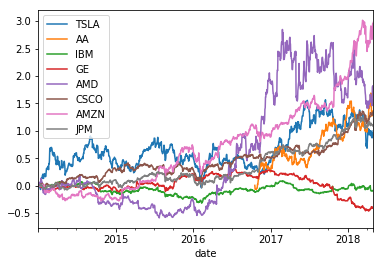

In [130]:
cumulative_returns.plot()

> At first glance it might seem surprising that the stock with the lowest closing price would attain the bronze position, but there might be some underlying mechanisms that could explain such stock behavior. Logically, it is easier for a company to return a larger cumulative gain if its stock naturally starts lower at the beginning of whichever time period is being inspected. However, the caveat is that such cumulative gains realized from a low stock price must be driven by strong improvements by the company on a macro level. CNBC Interviews with AMD's CEO, Lisa Su, reveal that her "long-term strategy is paying off" [5]. The tremendous stock increase under the leadership of Su would indicate that AMD is putting their best foot forward to gain market share through steady long term improvements.

> Few companies maintain a consumer excitement level like Tesla. One could argue that the cult of personality revolving Elon Musk has much to do with this. However, that does not take away from the monumental achievements accomplished by Tesla. The United States' auto industry has not seen a similar contender enter the market since the DeLorean Motor Company. It remains to be seen if Telsa will share the fate of DeLorean. The recent reports that "nearly a quarter of Tesla's Model 3 reservation deposits in the U.S." have been refunded certainly does not bode well [6]. With that being said, Musk is investing heavily into research and development surrounding self-driving cars. In fact, Telsa announced in late 2016 that their cars are now built with full autonomous driving capability hardware [7]. Smart transportation is one of the biggest problems smart cities face in the coming decades. Since the "number 1 use case for smart transportation for data science" is autonomous driving, Musk is steering Tesla to gain a market advantage in next generation technology [8]. Consequently, it is currently doubtful that Tesla will share the same fate as DeLorean in the 1980's.

> Hendrik Bessembinder, a finance professor at Arizona State University, states that Amazon belongs to a very small subset of special stocks [9]. Bessembinder goes on to argue that Amazon's stock classification is because "it's one of the greatest wealth creators since 1926, and it's reached that status in a very short period of time" [9]. Amazon's meteoric rise in cumulative returns is partly explained by it's rapid growth over the relatively short period of the company's lifespan. Of note is Amazon's decision to forgo dividend payments and instead reinvest it's capital into "disparate fields as cloud computing, movies, music, food, artificial intelligence and the distribution of washing machines and toasters" [9]. The extent of such diversification means that Amazon's shareholders are likely to continue to benefit from Amazon's cumulative returns.

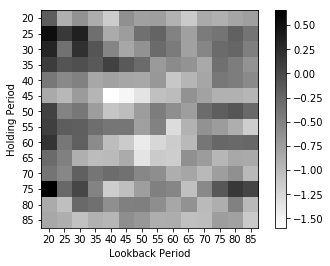

In [131]:
heatmap(ddf)
plt.show()

> The above heatmap displays the "momentum strategy of Sharpe ratio over various lookbacks and holding periods" [4]. The Sharpe ratio is the "average return earned in excess of the risk-free rate per unit of volatility or total risk" [10]. As a result, a higher Sharpe ratio indicates a larger average return. With regards to the heatmap, higher Sharpe ratios are reflected as darker pixels, whereas lower Sharpe ratios are displayed as lighter grey or white pixels. Cursory inspection of the heatmap reveals that a lookback period of 20 days contains the highest Sharpe ratio momentum strategies.

In [132]:
ddf.max().sort_values(ascending=False)

Lookback Period
20    0.651119
30    0.361639
80    0.154244
25    0.136330
40    0.066985
85    0.042112
        ...   
45   -0.139479
55   -0.233900
50   -0.288470
70   -0.300311
60   -0.436968
65   -0.615101
Length: 14, dtype: float64

> The above query confirms that a lookback period of 20 days results in the highest Sharpe ratio. Moreover, the second and third highest Sharpe ratios are offered by lookback periods of 20 and 80 days, respectively. The possible lookback periods in this case study range from 20 to 85 days. The above results indicate that overall risk-return of a portfolio benefits the most from smaller lookback periods. Furthermore, examination of the lookback period of 20 days itself lends to some interesting observations.

In [133]:
ddf[20].sort_values(ascending=False)

Holding Period
75    0.651119
25    0.535581
30    0.323846
60    0.194303
35    0.117282
55    0.093278
        ...   
65   -0.293998
70   -0.373818
40   -0.407015
85   -0.829831
45   -0.849591
80   -0.850565
Name: 20, Length: 14, dtype: float64

> Within the lookback period of 20 days, the maximum Sharpe ratio of the entire DataFrame comes from a holding period of 75 days. With regards to this case study, the holding period ranges from 20 to 85 days. Although the holding period of 75 days offers the greatest Sharpe ratio, some of the lowest Sharpe ratios are from holding periods of 80 and 85 days. This would indicate that the overall return compared to risk decreases. In other words, it is risky to hold onto a portfolio for too long, or the maximum period of time. Given a lookback period of 20, the top two Sharpe ratios are realized by a hold period of 75 and 25. Put differently, a portfolio achieves a better average return invest by either holding short or long term, while avoiding medium length holdings.

# <a name="Conclusion"></a>Future Work, Discussion, and Conclusion

> Within the scope of the stocks chosen for this case study, it is apparent that maintaining a lookback option of 20 days offers the best risk-return for a portfolio. Moreover, invoking lookback options of 20 days for both short term and long term holdings may offer the best overall portfolio return. Given the maximum Sharpe ratio for each lookback period, the overall maximum from a lookback period of 20 days is 80.05% higher than that of the second highest lookback period of 30 days. Specific to a lookback period of 20 days, the highest Sharpe ratios came from longer and shorter term holdings (75 and 25 days). However, the lower Sharpe ratios lends towards suggesting that the portfolio comprised of these specific stocks should not be held for the absolute longest, nor shortest periods.

> Despite its high stock price, Amazon appears still offer considerable cumulative returns for its stakeholders. Tesla's moderately consistent cumulative returns are inspiring considering its potential future in autonomous driving. AMD offers a potentially volatile, yet lucrative investment under the reign of its comparatively new CEO.

> A possible future improvement would be seeking understanding as to why so many observations were missing in regards to American Airlines. To what extent do this missing observations deceive, mislead, or bias any conclusions drawn in this case study? Such an investigation would offer better actionable insight. Perhaps a different source of financial data would contain less missing data. However, whether or not that data contains less bias would remain to be seen.

> Another future improvement would be to discern whether or not the composition of this specific portfolio lends itself to certain Sharpe ratios. Many of stocks chosen for this case study fall within the technology sector. To what extend does the texture of a portfolio with regards to the specific industry sectors influence a portfolio's average return earned in excess of the risk-free rate per unit of volatility [10]? Future work delving into shedding light on answering this question could offer investors practical and general actionable knowledge with how their portfolios should be structured.

# <a name="References"></a>References

https://www.investopedia.com/terms/s/sheep.asp

https://www.investopedia.com/terms/b/blackbox.asp

https://sites.tufts.edu/eeseniordesignhandbook/2015/signal-processing-in-finance/

https://xkcd.com/1600/

1) McKinney, West, https://github.com/wesm/pydata-book/tree/1st-edition

2) Slater, R.D., "Financial and Economic Data Applications." Ch11-code-new. 2018.

3) http://nipy.bic.berkeley.edu/nightly/pandas/doc/generated/pandas.Series.fillna.html

4) Oreilly Python for Data Analysis

5) https://www.cnbc.com/video/2018/04/26/amd-ceo-our-long-term-strategy-is-paying-off.html

6) https://www.recode.net/2018/6/4/17414496/nearly-a-quarter-of-teslas-model-3-reservation-deposits-in-the-u-s-have-supposedly-been-refunded

7) https://www.tesla.com/blog/all-tesla-cars-being-produced-now-have-full-self-driving-hardware

8) Greer, Melvin, "What is the number 1 use case for smart transportation for data science? Autonomous vehicles." Week 2 Synchronous lecture - break out discussion.

9) https://www.nytimes.com/2017/07/28/your-money/amazon-jeff-bezos.html

10) https://www.investopedia.com/terms/s/sharperatio.asp